In [1]:
%matplotlib inline

In [20]:
from random import random
import json
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
from IPython.display import HTML

In [3]:
# https://www.fec.gov/documents/1890/federalelections2016.xlsx
# https://www.britannica.com/topic/United-States-Electoral-College-Votes-by-State-1787124
df = pd.read_csv('../data/voting2016.csv')

In [4]:
df

State  EV    Trump  Clinton  Others
0     AL   9  1318255   729547   75570
1     AK   3   163387   116454   38767
2     AZ  11  1252401  1161167  159597
3     AR   6   684872   380494   65310
4     CA  55  4483814  8753792  943998
5     CO   9  1202484  1338870  238893
6     CT   7   673215   897572   74133
7     DE   3   185127   235603   23084
8     DC   3    12723   282830   15715
9     FL  29  4617886  4504975  297178
10    GA  16  2089104  1877963  147665
11    HI   4   128847   266891   33199
12    ID   4   409055   189765   91435
13    IL  20  2146015  3090729  299680
14    IN  11  1557286  1033126  144546
15    IA   6   800983   653669  111379
16    KS   6   671018   427005   86379
17    KY   8  1202971   628854   92324
18    LA   8  1178638   780154   70240
19    ME   4   335593   357735   54599
20    MD  10   943169  1677928  160349
21    MA  11  1090893  1995196  238957
22    MI  16  2279543  2268839  250902
23    MN  10  1322951  1367716  254146
24    MS   6   700714   485131   23512
25    MO  10  1594511  1071068  143026
26    MT   3   279240   177709   40198
27    NE   5   495961   284494   63772
28    NV   6   512058   539260   74067
29    NH   4   345790   348526   49980
30    NJ  14  1601933  2148278  123835
31    NM   5   319667   385234   93418
32    NY  29  2819533  4556118  345791
33    NC  15  2362631  2189316  189617
34    ND   3   216794    93758   33808
35    OH  18  2841005  2394164  261318
36    OK   7   949136   420375   83481
37    OR   7   782403  1002106  216827
38    PA  20  2970733  2926441  268304
39    RI   4   180543   252525   31076
40    SC   9  1155389   855373   92265
41    SD   3   227721   117458   24914
42    TN  11  1522925   870695  114407
43    TX  38  4685047  3877868  406311
44    UT   6   515231   310676  305523
45    VT   3    95369   178573   41125
46    VA  13  1769443  1981473  233715
47    WA  12  1221747  1742718  352554
48    WV   5   489371   188794   36258
49    WI  10  1405284  1382536  188330
50    WY   3   174419    55973   25457

In [5]:
print( df[df.Trump > df.Clinton].EV.sum() ) # actual was 304
print( df[df.Trump < df.Clinton].EV.sum() ) # actual was 227

305
233


In [6]:
# https://eric.clst.org/tech/usgeojson/
with open('../data/usmap.json') as f:
    usmap = json.load(f)
len(usmap['features'])

51

In [7]:
[(f['properties']['STATE'],f['properties']['NAME']) for f in sorted(usmap['features'], key=lambda e:e['properties']['NAME'])]

[('01', 'Alabama'),
 ('02', 'Alaska'),
 ('04', 'Arizona'),
 ('05', 'Arkansas'),
 ('06', 'California'),
 ('08', 'Colorado'),
 ('09', 'Connecticut'),
 ('10', 'Delaware'),
 ('11', 'District of Columbia'),
 ('12', 'Florida'),
 ('13', 'Georgia'),
 ('15', 'Hawaii'),
 ('16', 'Idaho'),
 ('17', 'Illinois'),
 ('18', 'Indiana'),
 ('19', 'Iowa'),
 ('20', 'Kansas'),
 ('21', 'Kentucky'),
 ('22', 'Louisiana'),
 ('23', 'Maine'),
 ('24', 'Maryland'),
 ('25', 'Massachusetts'),
 ('26', 'Michigan'),
 ('27', 'Minnesota'),
 ('28', 'Mississippi'),
 ('29', 'Missouri'),
 ('30', 'Montana'),
 ('31', 'Nebraska'),
 ('32', 'Nevada'),
 ('33', 'New Hampshire'),
 ('34', 'New Jersey'),
 ('35', 'New Mexico'),
 ('36', 'New York'),
 ('37', 'North Carolina'),
 ('38', 'North Dakota'),
 ('39', 'Ohio'),
 ('40', 'Oklahoma'),
 ('41', 'Oregon'),
 ('42', 'Pennsylvania'),
 ('44', 'Rhode Island'),
 ('45', 'South Carolina'),
 ('46', 'South Dakota'),
 ('47', 'Tennessee'),
 ('48', 'Texas'),
 ('49', 'Utah'),
 ('50', 'Vermont'),
 ('51',

In [8]:
usmap['features'][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0400000US04',
  'STATE': '04',
  'NAME': 'Arizona',
  'LSAD': '',
  'CENSUSAREA': 113594.084},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-112.538593, 37.000674],
    [-112.534545, 37.000684],
    [-112.368946, 37.001125],
    [-112.35769, 37.001025],
    [-111.412784, 37.001478],
    [-111.405869, 37.001481],
    [-111.405517, 37.001497],
    [-111.189888, 37.000959],
    [-110.75069, 37.003197],
    [-110.495259, 37.003875],
    [-110.33105, 36.998216],
    [-110.000677, 36.997968],
    [-109.381226, 36.999148],
    [-109.378039, 36.999135],
    [-109.270097, 36.999266],
    [-109.268213, 36.999242],
    [-109.26339, 36.999263],
    [-109.246917, 36.999346],
    [-109.233848, 36.999266],
    [-109.181196, 36.999271],
    [-109.045223, 36.999084],
    [-109.045244, 36.969489],
    [-109.045272, 36.968871],
    [-109.045407, 36.874998],
    [-109.045433, 36.874589],
    [-109.045973, 36.002338],
    [-109.046011, 35.925896],
    

In [9]:
features = sorted(usmap['features'], key=lambda e:e['properties']['NAME'])
for i,state in enumerate(features):
    print(df.State[i], state['properties']['NAME'])
    features[i]['properties']['STATE'] = df.State[i]
usmap['features'] = features

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
DC District of Columbia
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


In [10]:
usmap['features'][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0400000US01',
  'STATE': 'AL',
  'NAME': 'Alabama',
  'LSAD': '',
  'CENSUSAREA': 50645.326},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-88.124658, 30.28364],
     [-88.086812, 30.259864],
     [-88.074854, 30.249119],
     [-88.075856, 30.246139],
     [-88.078786, 30.245039],
     [-88.109432, 30.242097],
     [-88.120151, 30.246149],
     [-88.137083, 30.249179],
     [-88.166569, 30.249255],
     [-88.20854, 30.244807],
     [-88.280571, 30.230274],
     [-88.304773, 30.228031],
     [-88.313323, 30.230024],
     [-88.310025, 30.233233],
     [-88.299705, 30.231812],
     [-88.280781, 30.233781],
     [-88.25837, 30.239595],
     [-88.224615, 30.245559],
     [-88.17335, 30.252418],
     [-88.158303, 30.252393],
     [-88.141143, 30.255024],
     [-88.130631, 30.262125],
     [-88.124722, 30.273541],
     [-88.124658, 30.28364]]],
   [[[-86.783628, 34.991925],
     [-86.677616, 34.99207],
     [-86.676726, 34.99207],
 

In [11]:
# px.choropleth(df,
#               geojson=usmap,
#               locations='State',
#               featureidkey='properties.STATE',
#               scope='usa',
#               color='Trump',
#               color_continuous_scale=['blue', 'white', 'red']
#              )

In [12]:
# px.bar(df[:5], x=['Clinton', 'Trump'], y='State', barmode='group')

<BarContainer object of 5 artists>

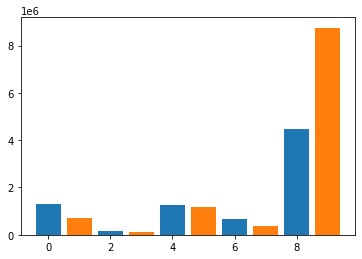

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.bar([0,2,4,6,8],df.Trump[:5])
ax.bar([1,3,5,7,9],df.Clinton[:5])


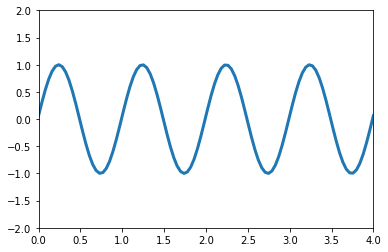

In [19]:
fig = plt.figure()
ax = plt.axes()
line, = ax.bar([], [], lw=3)

tx = []
ty = []

def init():
    line.set_data([], [])
    return line,

def animate(i):
    tx.append(-1+random())
    ty.append(df.Trump[0]/(df.Trump[0]+df.Clinton[0]) < random())
    line.set_data(tx, ty)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)
HTML(anim.to_jshtml())

In [140]:
for i,row in df.iterrows():
#     print(row)
    print(row.State, row.Trump/(row.Trump+row.Clinton) < random())

AL True
AK True
AZ False
AR True
CA True
CO False
CT False
DE True
DC True
FL False
GA False
HI False
ID False
IL False
IN False
IA True
KS False
KY False
LA True
ME True
MD True
MA True
MI True
MN False
MS False
MO False
MT True
NE False
NV True
NH False
NJ True
NM False
NY True
NC True
ND False
OH False
OK False
OR True
PA False
RI True
SC False
SD False
TN False
TX False
UT True
VT True
VA False
WA False
WV False
WI True
WY True
